# Plots for var decomp

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
D = pd.read_csv('variance_decomp.tsv',sep='\t')
D['within']=D.group+D.individual
# Rearrange dataframe into long format for easier plotting
T= D.melt(id_vars=['dataset','atlas','subj-id'],value_vars=['group','within'],var_name='vartype',value_name='variance')
T

,dataset,atlas,subj-id,vartype,variance
0,Pontine,MNISymDentate1,NaN,group,0.003258
1,Pontine,MNISymDentate1,S98,group,0.002645
2,Pontine,MNISymDentate1,S97,group,0.003190
3,Pontine,MNISymDentate1,S96,group,0.002884
4,Pontine,MNISymDentate1,S95,group,0.003677
...,...,...,...,...,...
223,Language,MNISymCereb2,sub-15,within,0.199910
224,Language,MNISymCereb2,sub-16,within,0.138594
225,Language,MNISymCereb2,sub-17,within,0.265675
226,Language,MNISymCereb2,sub-18,within,0.123011


In [ ]:
# Set Figure style to talk on black background

rc = {'axes.facecolor': 'black',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'black',
 'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}
sb.set_style(rc=rc)

(-0.01, 0.3)

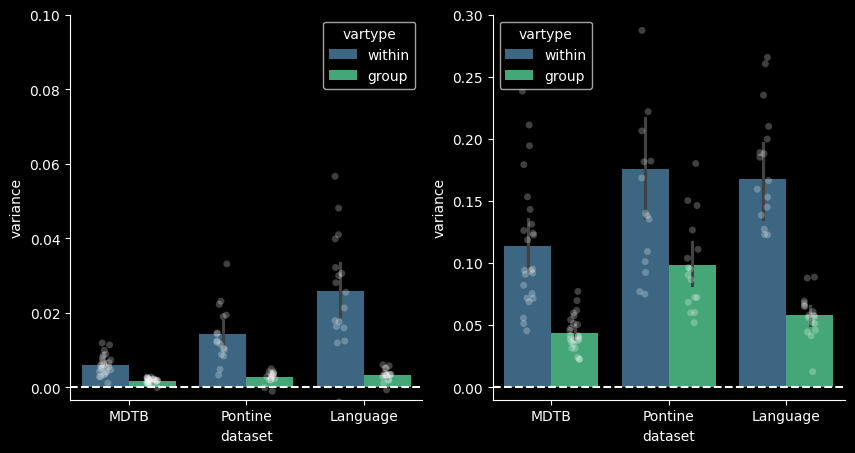

In [ ]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymDentate1']
ax=sb.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette='viridis')
sb.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.1)
plt.subplot(1,2,2)
X = T[T.atlas=='MNISymCereb2']
ax=sb.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette='viridis')
sb.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB','Pontine','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.3)

plt.savefig('variance_decomp.pdf')
